## Aufgabe 1
F&uuml;gen Sie dem ersten <strong>interact</strong>-Beispiel aus der Vorlesung einen <strong>dropdown</strong>-Element hinzu, womit man neben <strong>sin(x)/x</strong> auch <strong>arctan(x)</strong> ausw&auml;hlen kann.  

/nix/store/i2qx3jvn2h8l2kpf97kgs68r6way9lf2-sage-7.5/sage/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


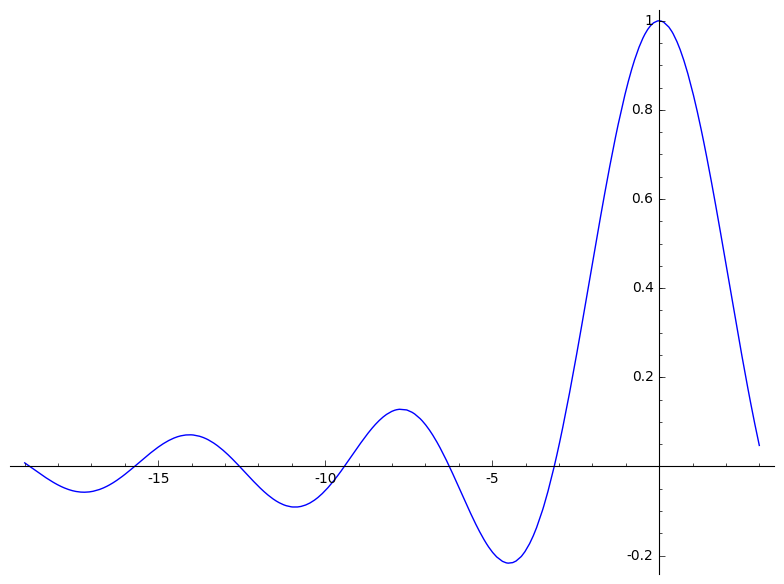

True

In [2]:
from ipywidgets import interact, interactive
from ipywidgets import IntSlider, Dropdown
@interact(a = IntSlider(-19, min=-20, max=20, description= 'Range '), 
          b = IntSlider(3, min=-20, max=20, description= 'Range '), 
          typ = Dropdown(description='Typ', options = ['sin(x)/x','arctan(x)']))
def _(a = -19, b =3 , typ = 'sin(x)/x'):
    plot(eval(typ), a , b).show()
    return True

## Aufgabe 2
Nehmen Sie das <strong>interact</strong>-Beispiel der Taylor-Funktion aus der Vorlesung. F&uuml;gen Sie folgende Elemente hinzu:  
<ul>
<li>eine <strong>Checkbox</strong>, welche Gitterlinien im plot an- und ausstellen kann.</li>
<li>ein <strong>IntSlider</strong>, der den Definitionsbereich angibt</li> sowie
<li>eine <strong>Text</strong>-Box, die den symbolischen Ausdruck enth&auml;lt. Setzen Sie den Default auf: $\sin(x)e^{-x}$</li>
<li>Eine weitere <strong>Text</strong>-Box, die den Entwicklungspunkt enth&auml;lt.</li>
</ul>
&Auml;ndern Sie den Code so, dass er die Elemente entsprechend ihrer Bedeutung in der Berechnung und Ausgabe nutzt.  

<script type="math/tex">f(x) = \sin\left(x\right)</script>

<script type="math/tex">f^x(0) = x + O(x^2)</script>

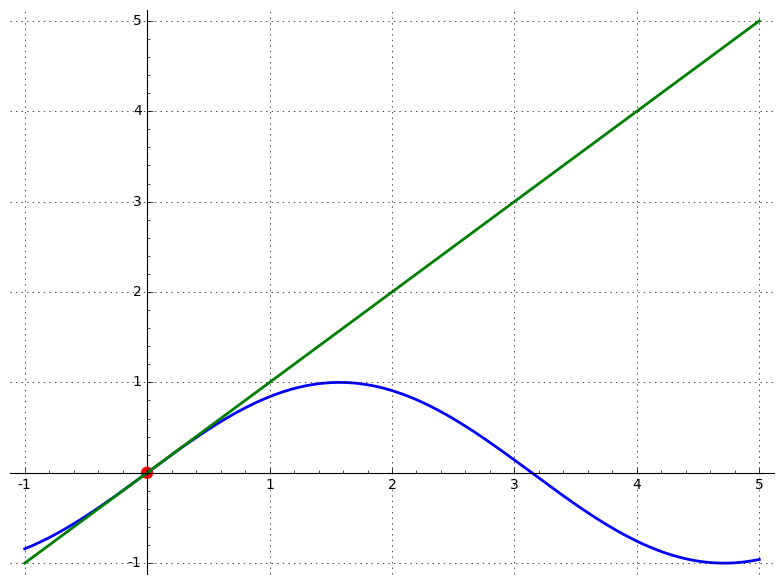

True

In [3]:
from ipywidgets import IntSlider, Checkbox, Text
@interact(a = IntSlider(-1,min=-20,max=20),
          b = IntSlider(5,min=-20,max=20),
          order = IntSlider(1,min=1,max=12),
          ch = Checkbox(description='Gitter (an/aus)', value=True),
          f = Text(value='sin(x)*e**(-x)',description='$f(x)=$') ,
          x0 = Text(value='0',description ='$x_0=$'))
def _(a = -1 , b = 5 , order= 1,ch = True, f = 'sin(x)*e**(-x)' ,x0 = '0'):
    f = sage_eval(f,locals={'x':x})
    x0 = sage_eval(x0)
    ft = f.taylor(x,x0,order)
    pretty_print(html ('$f(x) = {}$'.format(latex(f))))
    pretty_print(html ('$f^x({}) = {} + O(x^{})$'.format(x0,latex(ft),order+1)))
    pt = plot(ft,a, b, color='green', thickness=2)
    p   = plot(f,a,b, thickness=2)
    dot = point((x0,f(x=x0) ),pointsize=80,rgbcolor=(1,0,0))
    show(dot + p + pt, gridlines=ch)
    return True

## Aufgabe 3
(Erweiterung Aufgabe 3 , Blatt 13)  
Benutzen Sie Aufgabe 3 von Blatt 13 als Grundlage einer Kurvendiskussion. Bauen Sie die Kurvendiskussion in ein <em>interact</em> ein, sodass man über <em>interact</em> eine Funktion eingeben kann, zu der eine Kurvendiskussion durchgef&uuml;hrt wird.  
<ul>
<li>Eweitern Sie die Kurvendiskussion auf die Wendepunkte.</li>
<li>Die Ergebnisse der Kurvendiskussion sollen sowohl als Text als auch in einem Plot ausgegeben werden.</li>
<li>Dieser Plot soll alle lokalen Maxima, Minima und Wendepunkte markieren (und damit den sichtbaren Bereich sowohl in x wie y festlegen)</li>
</ul>

In [4]:
#global out
#Bei der Aufgabe vorsicht mit Auswertungen. Je nach Funktion, kann das Programm es aus technischen Gruenden evtl. nicht auswerten
@interact(ch = Checkbox(description='Gitter (an/aus)',value=True),
          f = Text(value='x^2*exp(x)',description='$f(x)=$'),
         __manual=True)
def kurvendiskussion(ch = True,f = 'x^2*exp(x)'):
    """ Macht eine Kurvendiskussion zum gegebenen Ausdruck.
    Parameter:\n
    f :  Ausdruck \n
    return : Dictionary der lokalen Extrema, seines Wertes und des Typs (Maxima/Minima)
    """
    #global out
    f = sage_eval(f,locals={'x':x})
    f(x) = f
    out = [] #Ausgabe Liste
    graph = Graphics() #leeres Grafikobjekt
    assume(x,'real') # um komplexe Loesungen zu vermeiden
    deriv1(x) = f.diff(x) # Erste Ableitung
    deriv2(x) = deriv1.diff(x) # Zweite Ableitung
    #Extrempunkte finden. Wir sorgen dafuer, dass es nur explizite Loesungen gibt. Bei leerer Loesung koennen wir versuchen eine numerische zu finden.
    # to_poly_solve findet "mehr" Loesungen, koennen aber approximativ sein.
    extrema = solve(deriv1 == 0, x,solution_dict=True,to_poly_solve=True,explicit_solutions=True)  
    if len(extrema) == 0:
        #versuche numerisch zu loesen
        #Das Intervall wird jetzt der Einfachheit halber festgesetzt. 
        #try: except: ist eine Moeglichkeit Fehler so abzufangen, dass das programm weiter laufen kann. In diesem Fall noetig um abzufangen, wenn find_root keine Nullstelle findet.
        try:
            extrema.append({ x: deriv1.find_root(-1,1)})
        except:
            print "keine numerische Lösung für Extrempunkte gefunden"
    for sol in extrema:
        out.append({})
        out[len(out)-1]['x'] = sol[x]
        out[len(out)-1]['y'] = f(sol[x])
        graph += point((out[len(out)-1]['x'],out[len(out)-1]['y']),pointsize=80,rgbcolor=(1,0,0))
        if deriv2(sol[x]) < 0:
            out[len(out)-1]['type'] = 'Maximum'
        else:
            out[len(out)-1]['type'] = 'Minimum'  
    wendepunkte = solve(deriv2==0,x,solution_dict=True,to_poly_solve=True,explicit_solutions=True)
    if len(wendepunkte) == 0:
        #versuche numerisch zu loesen
        try:
            wendepunkte.append({x : deriv2.find_root(-1,1)})
        except:
            print "keine numerische Lösung für Wendepunkte gefunden"
    for wp in wendepunkte:
        if abs(f.diff(x,3)(x=wp[x])) > 10^(-11):
            out.append({})
            out[len(out)-1]['x'] = wp[x]
            out[len(out)-1]['y'] = f(wp[x])
            out[len(out)-1]['type'] = 'Wendepunkt'
    pretty_print(html ('$f(x) = {}$'.format(latex(f))))
    pretty_print(html ('$f^\prime(x) = {}$'.format(latex(deriv1))))
    show(out)
    #Wenn wir keine Extrempunkte gefunden haben, defaultwerte ausgeben
    if len(out) <> 0:
        a=min([el['x'] for el in out])-0.3
        b=max([el['x'] for el in out])+0.3
        ay=min([el['y'] for el in out])-0.8
        by=max([el['y'] for el in out])+0.8
    else:
        a=-1
        b=1
        ay=-2
        by=2
    graph += plot(f,a, b, color='green', thickness=2,legend_label='$f(x)$')
    graph += plot(deriv1,a,b, thickness=2,legend_label='$f^\prime(x)$')
    show(graph, gridlines=ch,ymin=ay,ymax=by)
    return True

## Aufgabe 4
Fügen Sie nun verschiedene Aufgaben zusammen, um Ihr eigenes Hangman-Spiel zu programmieren, das Sie mit Ihrem Nachbarn spielen können.

Importieren Sie 
```python
import getpass
```

Kopieren Sie die Funktionen aus:
* Blatt 4, Aufgabe 6: `CheckLetter()`;
* Blatt 9, Aufgabe 5: `PrintWord()`;
* Blatt 12, Aufgabe 4: `CheckWin()`.

Schreiben Sie eine Funktion ```DrawPicture()```, welche den Hangman
```python
    man = ['________ ',
           '|       | ',
           '|       O ',
           '|       | ',
           '|      /|\ ',
           '|       | ',
           '|      / \ ']
```
bis zu einer bestimmten Zeile (Input) zeichnet.

Verwenden Sie
```python
word = getpass.getpass()
```
für die Generierung eines Wortes.

Verwenden Sie nun `@interact`, um einen Eingabebuchstaben zu bekommen.

Fügen Sie alle Informationen zusammen, um Ihr Hangman-Programm fertigzustellen.
* Überprüfen Sie zuerst, ob die Eingabe wirklich ein Buchstabe ist.
* Überprüfen Sie, ob der Buchstabe schon einmal geraten wurde.
* Fügen Sie den Buchstaben der Liste `false_guesses` hinzu, falls er nicht im Wort vorkommt.
* Lassen Sie das Wort mittels `PrintWord()` ausgeben.
* Lassen Sie den Hangman zeichnen.
* Lassen Sie zudem zurückgeben, ob man schon verloren oder gewonnen hat.

In [61]:
reset()
forget()
from ipywidgets import interact, interactive
from ipywidgets import Text
import getpass

# Blatt 4
def CheckLetter(tocheck):
    if (tocheck.isalpha()) and (len(tocheck) == 1):
        return(True)
    else:
        return (False)

# Blatt 9
def PrintWord(word, guesses):
    resulting_word = ''
    for letter in word:
        if letter in guesses:
            resulting_word += letter + ' '
        else:
            resulting_word += '_ '
    return(resulting_word)

# Blatt 12
def CheckWin(word, guesses):
    guesses = list(set(guesses))
    already_guessed = 0
    for letter in guesses:
        already_guessed += word.count(letter)
    if already_guessed == len(word):
        return(True)
    else:
        return(False)
    
def DrawPicture(lines):
    man = ['________ ',
           '|       | ',
           '|       O ',
           '|       | ',
           '|      /|\ ',
           '|       | ',
           '|      / \ ']
    if lines > 0:
        for line in range(lines):
            print(man[line])
    if len(false_guesses) < len(man):
        return(True)
    else:
        return(False)
    

word = getpass.getpass()
guesses = []
false_guesses = []
    
@interact(letter = Text(value = '', description = 'Geratener Buchstabe'),
          __manual=True)

def Hangman(letter = ''):
    if CheckLetter(letter):
        if letter not in guesses:
            guesses.append(letter)
            guesses.append(letter.upper())
            if (letter not in word) and (letter.upper() not in word):
                false_guesses.append(letter)
        print(PrintWord(word, guesses))
        if not(DrawPicture(len(false_guesses))):
            print("Sie haben verloren.")
    else:
        print("Das ist kein Buchstabe")
        print(PrintWord(word, guesses))
    if (CheckWin(word, guesses)):
        print("Sie haben das Wort erraten.")

d a s d a s 
________ 
|       | 
Sie haben das Wort erraten.
